The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

In [1]:
from datascience import *
import pandas as pd 
import sklearn as sk
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plots
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
data = pd.read_csv("SIREN_data_cleaned.csv")
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 7, col:col + 7]
    interact(peek, row=(0, len(df), 7), col=(0, len(df.columns) - 7))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))
labels = data.columns.values

In [3]:
data

,case_control,age,sex,height,BMI,life_tob,life_alc,life_vegetarian,life_stim,life_cocaine,htn,dm,stroke,obesity,heart,sickle_cell,stress,depression
0,0,71,1,162.0,25.148605,2,1,0,0,0,1,0,0,0,0,0,0,0
1,0,71,1,156.0,23.833005,2,1,0,0,0,0,0,0,0,0,0,0,0
2,0,40,1,168.0,23.030045,2,3,0,0,0,1,0,0,0,0,0,0,0
3,0,79,1,151.5,22.002200,2,4,0,0,0,0,0,0,0,0,0,1,1
4,0,62,1,170.0,21.626298,2,4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,1,75,2,158.0,26.077552,0,0,0,0,0,1,0,0,0,0,0,0,0
2838,1,62,1,162.0,19.852157,0,0,0,0,0,1,0,0,0,0,0,0,0
2839,1,53,1,187.0,28.596757,0,0,0,0,0,1,0,0,0,0,0,0,0
2840,1,42,2,168.0,20.549887,0,0,0,0,0,0,0,0,0,0,0,0,0


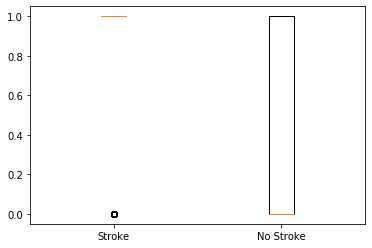

In [5]:
#Example Plot for Variables / CHECK IF 1 = Stroke
plots.boxplot([data.htn[data.case_control == 1]\
             ,data.htn[data.case_control == 0]],\
           labels = ('Stroke', 'No Stroke'));

Text(0, 0.5, 'BMI')

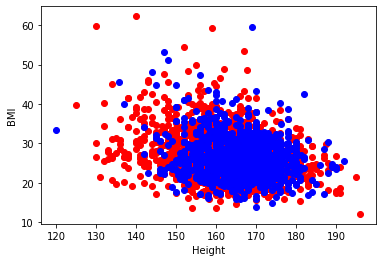

In [6]:
#PLEASE NOTE THAT THIS IS JUST AN EXAMPLE AND SHOULD PROBABLY BE WEIGHT AND NOT BMI

plots.scatter(data[data.case_control==0]['height'],data[data.case_control==0]['BMI'],
              color="red",label="MPG 0")
plots.plot(data[data.case_control==1]['height'],data[data.case_control==1]['BMI'],
           'bo',label="MPG 1")
plots.xlabel('Height')
plots.ylabel('BMI')

In [7]:
#Specifying variables we want and dropping rows with null values
y_data = data["case_control"]
x_data = data.drop(["case_control"], axis=1)

In [13]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

# construct a smaller data frame with Hemoglobin and Glucose standard units
data_KNN=pd.DataFrame(
        {"height": standard_units(data.height),
         "BMI": standard_units(data.BMI),
         "age": standard_units(data.age),
        "sex": data.sex,
         "life_tob" : data.life_tob,
         "life_vegetarian" : data.life_vegetarian,
         "life_stim" : data.life_stim,
         "life_cocaine" : data.life_cocaine,
         "obesity" : data.obesity,
         "heart" : data.heart,
         "sickle_cell" : data["sickle_cell"],
         "depression" : data.depression,
        "htn": data.htn,
         "stroke": data.stroke,
         "dm" : data.dm,
         "stress" :data.stress,
        "case_control": data.case_control})

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
from sklearn.metrics import accuracy_score

In [15]:
X = data_KNN[['height', 'htn', 'stroke', 'dm', 'stress']]
y = data_KNN["case_control"]
#y = pd.Categorical.from_codes(data_KNN_prediction.case_control)
#y = pd.get_dummies(y, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

accuracy_score(y_test, y_pred)


[[348  77]
 [147 139]]


0.6849507735583685

In [16]:
X2 = data_KNN[['height', 'htn', 'stroke', 'dm', 'stress', 'obesity']]
y2 = data_KNN["case_control"]
#y = pd.Categorical.from_codes(data_KNN_prediction.case_control)
#y = pd.get_dummies(y, drop_first=True)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1)

knn2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn2.fit(X_train2, y_train2)

y_pred2 = knn2.predict(X_test2)

cf_matrix2 = confusion_matrix(y_test2, y_pred2)
cf_matrix2

print(cf_matrix2)

accuracy_score(y_test2, y_pred2)

[[345  80]
 [142 144]]


0.6877637130801688

In [ ]:
X3 = data_KNN[['height', 'htn', 'stroke', 'dm', 'stress', 'obesity', 'life_tob']]
y3 = data_KNN["case_control"]
#y = pd.Categorical.from_codes(data_KNN_prediction.case_control)
#y = pd.get_dummies(y, drop_first=True)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=1)

knn3 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn3.fit(X_train3, y_train3)

y_pred3 = knn3.predict(X_test3)

cf_matrix3 = confusion_matrix(y_test3, y_pred3)
cf_matrix3

print(cf_matrix3)

accuracy_score(y_test3, y_pred3)

In [17]:
X4 = data_KNN[['height', 'htn', 'stroke', 'dm', 'stress', 'obesity', 'life_tob', 'heart']]
y4 = data_KNN["case_control"]
#y = pd.Categorical.from_codes(data_KNN_prediction.case_control)
#y = pd.get_dummies(y, drop_first=True)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, random_state=1)

knn4 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn4.fit(X_train4, y_train4)

y_pred4 = knn4.predict(X_test4)

cf_matrix4 = confusion_matrix(y_test4, y_pred4)
cf_matrix4

print(cf_matrix4)

accuracy_score(y_test4, y_pred4)

[[336  89]
 [126 160]]


0.6976090014064698

In [18]:
#Changing the Number of Neighbors

X4 = data_KNN[['height', 'htn', 'stroke', 'dm', 'stress', 'obesity', 'life_tob', 'heart']]
y4 = data_KNN["case_control"]
#y = pd.Categorical.from_codes(data_KNN_prediction.case_control)
#y = pd.get_dummies(y, drop_first=True)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, random_state=1)

knn4 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn4.fit(X_train4, y_train4)

y_pred4 = knn4.predict(X_test4)

cf_matrix4 = confusion_matrix(y_test4, y_pred4)
cf_matrix4

print(cf_matrix4)

accuracy_score(y_test4, y_pred4)

[[347  78]
 [135 151]]


0.70042194092827

In [19]:
X5 = data_KNN[['height', 'htn', 'stroke', 'dm', 'stress', 'obesity', 'life_tob', 'heart', 'age']]
y5 = data_KNN["case_control"]
#y = pd.Categorical.from_codes(data_KNN_prediction.case_control)
#y = pd.get_dummies(y, drop_first=True)

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, random_state=1)

knn5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn4.fit(X_train5, y_train5)

y_pred5 = knn4.predict(X_test5)

cf_matrix5 = confusion_matrix(y_test5, y_pred5)
cf_matrix5

print(cf_matrix5)

accuracy_score(y_test5, y_pred5)

[[332  93]
 [135 151]]


0.679324894514768

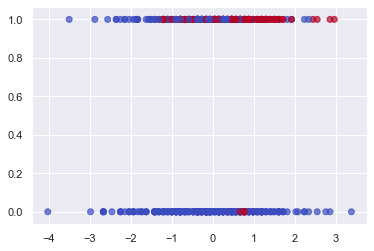

In [20]:
plt.scatter(
    X_test['height'],
    X_test['htn'],
    #X_test['stroke'],
    #X_test['dm'],
    #X_test['stress'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

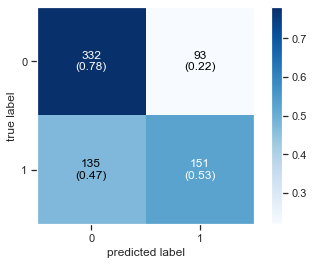

In [22]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat = cf_matrix5,
                               show_absolute = True,
                               show_normed = True, 
                               colorbar= True)